### Работа с временными рядами

#### Нативные даты и время языка Python: пакеты datetime и dateutil

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
datetime(year=2019, month=3, day=24)

datetime.datetime(2019, 3, 24, 0, 0)

In [3]:
#dateutil выполняет синтаксичческий разбор дат
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date2 = parser.parse("24 March 2019")
date2

datetime.datetime(2019, 3, 24, 0, 0)

In [5]:
date2.strftime('%A')

'Sunday'

#### Типизированные массивы значений времени: тип datetime64 библиотеки NumPy

In [6]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [7]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [8]:
# Дата/время на основе единицы - день
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [9]:
# Дата/время на основе единицы - минута
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [10]:
# можно задать единицу, например наносекунду
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Даты и время в Pandas

In [11]:
date = pd.to_datetime("4-th of March 2019")
date

Timestamp('2019-03-04 00:00:00')

In [12]:
date.strftime('%A')

'Monday'

In [13]:
date + pd.to_timedelta(np.arange(12))

DatetimeIndex([          '2019-03-04 00:00:00',
               '2019-03-04 00:00:00.000000001',
               '2019-03-04 00:00:00.000000002',
               '2019-03-04 00:00:00.000000003',
               '2019-03-04 00:00:00.000000004',
               '2019-03-04 00:00:00.000000005',
               '2019-03-04 00:00:00.000000006',
               '2019-03-04 00:00:00.000000007',
               '2019-03-04 00:00:00.000000008',
               '2019-03-04 00:00:00.000000009',
               '2019-03-04 00:00:00.000000010',
               '2019-03-04 00:00:00.000000011'],
              dtype='datetime64[ns]', freq=None)

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11',
               '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15'],
              dtype='datetime64[ns]', freq=None)

In [15]:
date + pd.to_timedelta(np.arange(12), 'Y')

DatetimeIndex(['2019-03-04 00:00:00', '2020-03-03 05:49:12',
               '2021-03-03 11:38:24', '2022-03-03 17:27:36',
               '2023-03-03 23:16:48', '2024-03-03 05:06:00',
               '2025-03-03 10:55:12', '2026-03-03 16:44:24',
               '2027-03-03 22:33:36', '2028-03-03 04:22:48',
               '2029-03-03 10:12:00', '2030-03-03 16:01:12'],
              dtype='datetime64[ns]', freq=None)

#### Временные ряды в Pandas: индексация по времени

In [16]:
# создадим Series с индексированными по времени данными
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [17]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [18]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Структуры данных для временных рядов библиотеки Pandas

Timestamp - для меток даты/времени (DatetimeIndex)

Period - для периодов (PeriodIndex)

Timedelta - для временных дельт (TimedeltaIndex)

In [19]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [20]:
# переводим DatetimeIndex в PeriodIndex и указываем периоичность интервала - день (D)
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [21]:
# TimedeltaIndex можно получить путем вычитания одной даты из другой
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

##### Создание регулярных последовательностей

`pd.date_range` - для меток даты/времени

`pd.period_range` - для периодов времени

`pd.timedelta_range` - для временных дельт

Передается начало, конец и (необязательно) шаг

In [22]:
pd.date_range('2015-07-03', '2015-07-10') # правая граница включена в последовательность

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# можно так
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# меняем шаг
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [26]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [27]:
# можно гибко менять периоличность
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [28]:
# создать смещение на 1 рабочий день
from pandas.tseries.offsets import BDay
pd.date_range('2019-03-22', periods=5, freq=BDay())

DatetimeIndex(['2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28'],
              dtype='datetime64[ns]', freq='B')

#### Передискретизация, временные сдвиги и окна

In [29]:
!pip install pandas-datareader

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
from pandas_datareader import data

In [31]:
IEX = data.DataReader("BAC", "iex", start='2015', end='2019')

In [32]:
IEX.head()

,open,high,low,close,volume
date,,,,,
2015-01-02,16.8293,16.8667,16.5394,16.7451,48951133
2015-01-05,16.6375,16.6609,16.1745,16.2587,105605485
2015-01-06,16.2961,16.3148,15.6974,15.7722,144912399
2015-01-07,16.0342,16.0716,15.7816,15.8471,104603795
2015-01-08,16.0529,16.2213,15.9967,16.1745,73388499


In [33]:
# посмоотри на индексы, ни нам понадобятся в типе DatetimeIndex, TimedeltaIndex или PeriodIndex
IEX.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='date', length=1006)

In [34]:
type(IEX.index[0])

str

In [35]:
IEX.index=pd.to_datetime(IEX.index)

In [36]:
type(IEX.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
# будем пока использовать только конченую цену close
IEX = IEX['close']

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

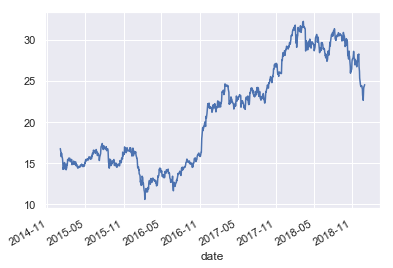

In [39]:
IEX.plot();

#### Передискретизация и изменение периодичности интервалов

resample()

asfreq()

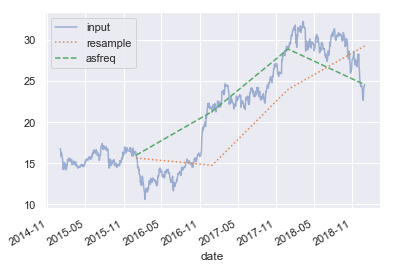

In [40]:
IEX.plot(alpha=0.5, style='-')
IEX.resample('BA').mean().plot(style=':')
IEX.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

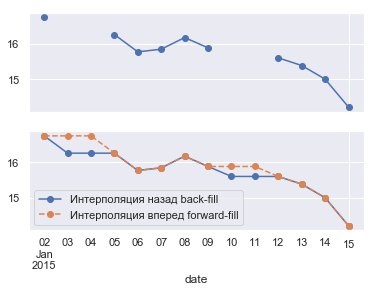

In [41]:
# в выходные значения равны NA. Используем интерполяцию
fig, ax = plt.subplots(2, sharex=True)
data = IEX.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["Интерполяция назад back-fill", "Интерполяция вперед forward-fill"]);

#### Временные сдвиги

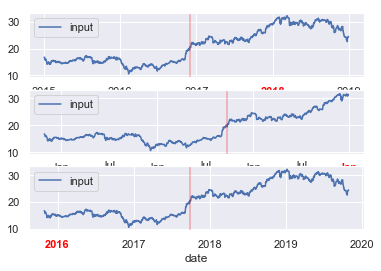

In [42]:
fig, ax = plt.subplots(3, sharey=True)
# задаем периодичность данных
data = IEX.asfreq('D', method='pad')

data.plot(ax=ax[0])
data.shift(300).plot(ax=ax[1])
data.tshift(300).plot(ax=ax[2])

# легенды и пояснения
local_max = pd.to_datetime('2016-11-30')
offset = pd.Timedelta(300, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['input'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['input'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')



Text(0,0.5,'% Return on Investment')

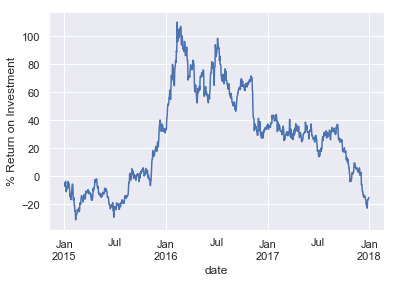

In [43]:
ROI = 100 * (data.tshift(-365) / data - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

#### Скользящие окна

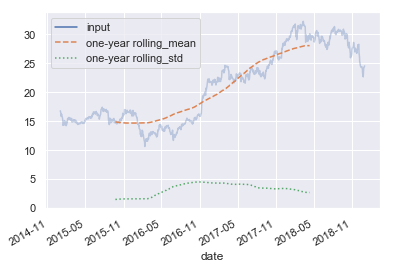

In [44]:
# одногодичное скользящее среднее значение и стандартное отклонение цен на акции Гугл 
rolling = IEX.rolling(365, center=True)
data = pd.DataFrame({'input': IEX,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

#### Пример: визуализация количества велосипедов в Сиэтле

https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k

In [47]:
!curl -o FremontBridge.csv
!https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information
"https:" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [49]:
data = pd.read_csv('Fremont_Bridge.csv', index_col = 'Date', parse_dates=True)
data.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 04:00:00,6.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 00:00:00,4.0,9.0


In [50]:
data.shape

(57624, 2)

In [52]:
# сократим названия столбцов и добавим столбец Итого
data.columns = ['East', 'West']
data['Total'] = data.eval('East + West')

In [53]:
data.tail()

,East,West,Total
Date,,,
2012-10-03 04:00:00,6.0,1.0,7.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 00:00:00,4.0,9.0,13.0


In [54]:
data.describe()

,East,West,Total
count,57615.000000,57615.000000,57615.000000
mean,51.916914,58.359889,110.276803
std,67.368033,84.958511,139.743003
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


In [57]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57615 entries, 2019-04-30 23:00:00 to 2012-10-03 00:00:00
Data columns (total 3 columns):
East     57615 non-null float64
West     57615 non-null float64
Total    57615 non-null float64
dtypes: float64(3)
memory usage: 1.8 MB


##### Визуализация данных

In [58]:
%matplotlib inline
import seaborn; seaborn.set()

Text(0,0.5,'Количество велосипедов по часам')

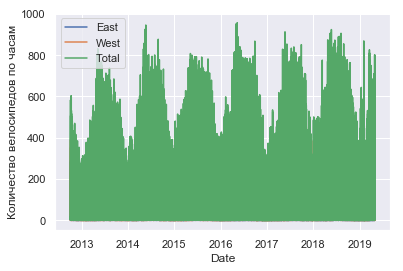

In [60]:
data.plot()
plt.ylabel('Количество велосипедов по часам')

Text(0,0.5,'Количество велосипедов по неделям')

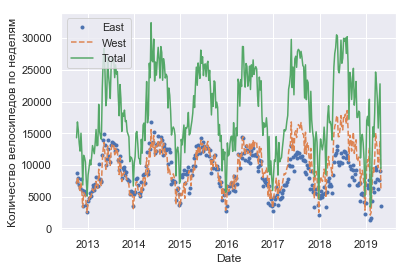

In [64]:
# сделаем передискретизацию с шагом 1 неделя
weekly = data.resample('W').sum()
weekly.plot(style=['.', '--', '-'])
plt.ylabel('Количество велосипедов по неделям')

Text(0,0.5,'Среднее количество велосипедов по часам')

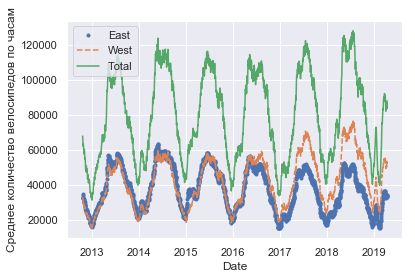

In [65]:
# скользящее среднее
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['.', '--', '-'])
plt.ylabel('Среднее количество велосипедов по часам')

Text(0,0.5,'Среднее количество велосипедов \n(сглаженная Гауссова функция)')

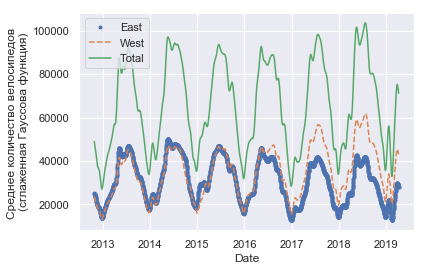

In [68]:
# сгладим график
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=['.', '--', '-'])
plt.ylabel('Среднее количество велосипедов \n(сглаженная Гауссова функция)')

##### Углубляемся в изучение данных

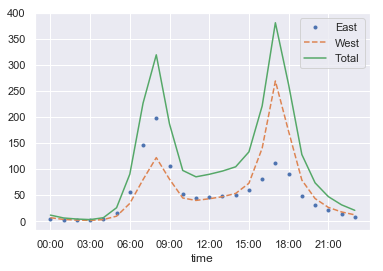

In [73]:
# если нужно увидеть усредненное движение вело транспорта как ффункцию от времени суток
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 3 * 60 * 60 * np.arange(8)
by_time.plot(xticks=hourly_ticks, style=['.', '--', '-'])

In [71]:
data.groupby(data.index.time).mean()

,East,West,Total
00:00:00,4.980008,6.605581,11.585589
01:00:00,2.770929,3.327780,6.098709
02:00:00,1.990818,2.074290,4.065109
03:00:00,1.558517,1.427738,2.986256
04:00:00,3.521866,3.055394,6.577259
05:00:00,16.246147,9.552270,25.798417
06:00:00,56.058726,34.042066,90.100791
07:00:00,146.492711,79.658892,226.151603
08:00:00,197.052062,121.780092,318.832153
09:00:00,105.874167,80.383333,186.257500


Text(0,0.5,'Среднее кол-во велосипедов по дням')

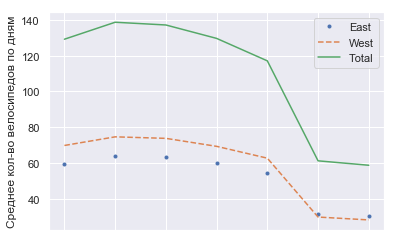

In [76]:
# если нужно увидеть усредненное движение вело транспорта как функцию от дня недели
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС']
by_weekday.plot(style=['.', '--', '-'])
plt.ylabel('Среднее кол-во велосипедов по дням')

In [77]:
# посмотрим на почасовой тренд в будни и выходные
weekend = np.where(data.index.weekday > 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


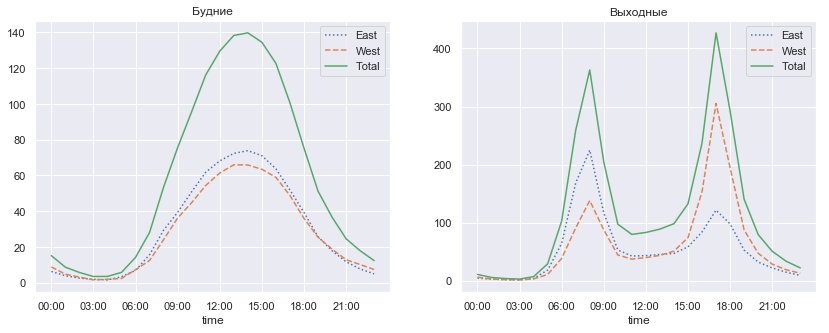

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Будние',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Выходные',
                           xticks=hourly_ticks, style=[':', '--', '-']);

#### Увеличение проиводительности библиотеки Pandas: eval() и query()

##### Основания для использования функций eval() и query(): составные выражения

In [81]:
# векторизованные операции быстрее спискового включения или цикла
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(16)
y = rng.rand(16)
%timeit x + y

643 ns ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [84]:
%timeit np.fromiter( (xi + yi for xi, yi in zip(x,y) ), dtype=x.dtype, count=len(x) )

5.68 µs ± 238 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [85]:
# но не так эффективно при вычислении составных выражений
mask = (x >0.5) & (y<0.5)

In [87]:
# эквивалент
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)

mask = tmp1 & tmp2

In [89]:
# библиотека может вычислять выражение поэлементно и более эффективно
import numexpr
mask_numexpr = numexpr.evaluate('(x>0.5) & (y<0.5)')
np.allclose(mask, mask_numexpr)

True

##### Использование функции pandas.eval() для эффективных операций

In [90]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols) ) for i in range(4) )

In [92]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211


In [93]:
# для вычисления суммы при стандартном подходе нужно
%timeit df1 + df2 + df3 + df4

140 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
# а при помощи eval эффективнее
%timeit pd.eval('df1 + df2 + df3 + df4')

65.2 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [95]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4') )

True

###### Поддерживаемые функцией pd.eval() операции

In [97]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3) ) ) 
                          for i in range(5) ) 

Арифметические операторы

In [99]:
# поддерживает все арифметические операции
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

Операторы сравнения

In [101]:
# поддерживает все операторы сравнения
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
#result2 = pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')
result2 = pd.eval('(df1 < df2 <= df3!= df4)')
np.allclose(result1, result2)

True

Побитовые операторы

In [102]:
# поддерживает Побитовые операторы & и | и литералов в булевых выражениях
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [104]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3, result2)

True

Атрибуты объектов и индексы

In [105]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

##### Использование метода DataFrame.eval() для выполнения операций по столбцам

In [106]:
# позволяет ссылаться на столбы по имени
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [107]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [108]:
# еще лаконичнее
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

##### Присваивание в методе DataFrame.eval()


In [109]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [110]:
# вычислить и создать новый столбец
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [111]:
# вычислить и изменить существующий столбец
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


##### Локальные переменные в методе DataFrame.eval()


In [112]:
# символ @ отмечает имя переменной, а не столбца
# это умеет DataFrame.eval(), но не pandas.eval() !!!
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

##### Метод DataFrame.query()


In [114]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [115]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [116]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

In [117]:
# размер массива в байтах 
df.values.nbytes

32000